# AutoEncoder簡介<br>
 <font size=4>
    訓練AutoEncoder(AE)是不需要「標註(Labeling)」。<br><br>
    AutoEncoder(AE)和Generative Adversarial Network(GAN)都屬於unsupervised learning的領域。<br><br>
    兩種演算法看似很像，很多人會拿這兩種方法比較資料生成的效能。<br>
   

<font size=4> AutoEncoder(AE)的運作是期望:<br>
透過輸入盡量和輸出逼近的方式，讓神經網路架構自行學習模型的權重。
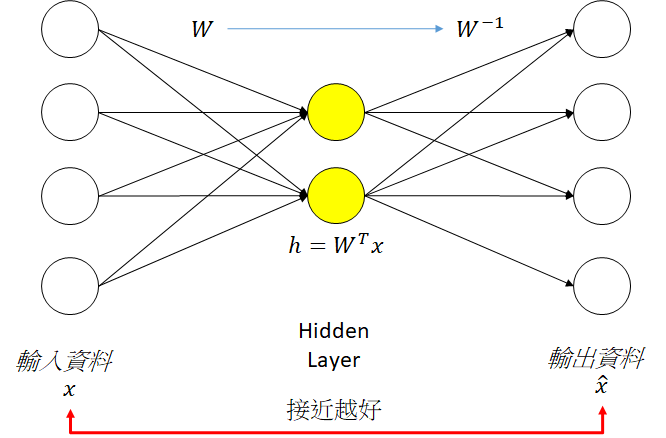

<font size=4> 上述的方式是非常簡單的AE，基本上這樣的訓練只要找輸入到隱藏層的權重($W$)即可，因為隱藏層到輸出層的權重只要是輸入到隱藏層的反矩陣($W^{-1}$)即可。
$$\hat x = W^{-1}h = W^{-1}(W^Tx)=x$$

當然上述我沒有考慮非線性運算元，但概念差不多。
我們也可以藉由推疊多個AE讓模型的複雜度更高，也就是Stacked AE，類似下圖
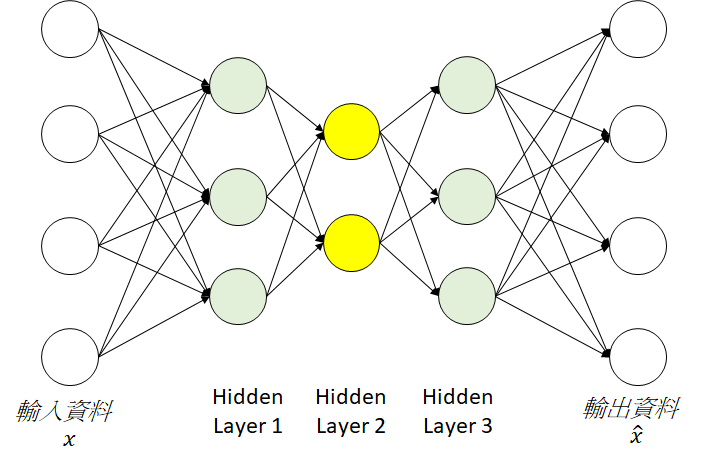

 <br><font size=6 color='red'>* **AE最關鍵的是輸入和輸出大小需要一致**</font> <br> <br>

<font size=4>
Stacked AE/AE範例圖片的Hidden數量可為任意，數量不一定要比輸入或是輸出少，範例圖純粹是我不想畫太多。


## 那AE有什麼用?   

<font size=4 >Ans: AE我認為有幾種重要功能，可能不同的人對於AE的認知不同，因為我除了VAE和DAE後就沒在看相關文獻，所我目前的認知就只有幾種功能。 <br>
    
1. 得到更好的pretrained-weight
2. 特徵學習
3. 資料生成
4. 去除雜訊 (本堂課不講述)
5. 異質偵測 (本堂課不講述)
    </font>

## 1.得到更好的pretrained-weight<br>

<font size=4>
假設我們設計一個神經網路，如下圖，然後假設W1和W2合起來的參數有1萬個。(圖畫的node數很少，我真的很懶得拉，但假設參數爆炸的多)<br>
我們收集的數據有1萬筆，但因能力有限，我能標註好的資料只有100筆。<br>
</font>

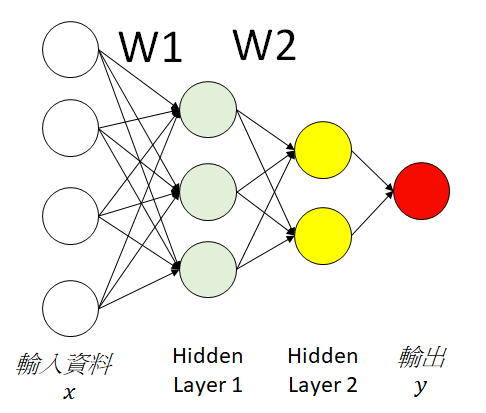    
    
<font size=4>    
我們用100筆資料去訓練一個1萬參數的神經網路，然後訓練模型前的權重是隨機生成，這樣的訓練結果一定有問題。<br>
所以可以我們可以善用那1W筆數據。<br>
    
先拿那一萬筆資料訓練AE，然後再將裡面的權重拿來給我們要做辨識的神經網路模型用。(見下圖)<br>
這樣的模式等於我用一萬筆資料訓練好一個模型得到好的pretrained weight，然後再用100筆資料進行fine-tuning。
</font>    



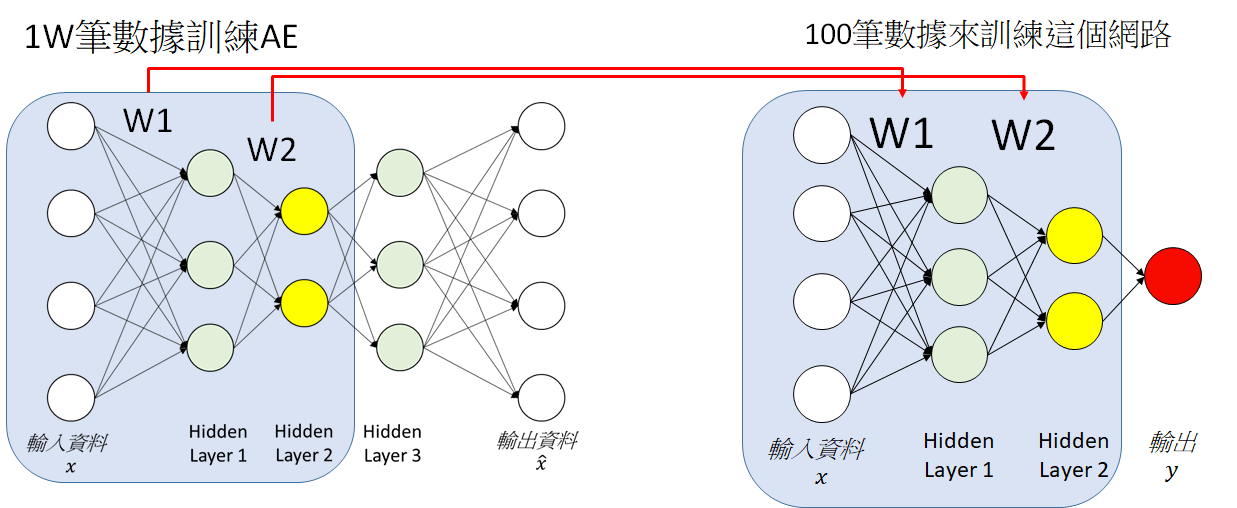


## 2. 特徵學習<br>
<font size = 4 >從上圖我們可以將AE架構，一般化為下圖</font>    
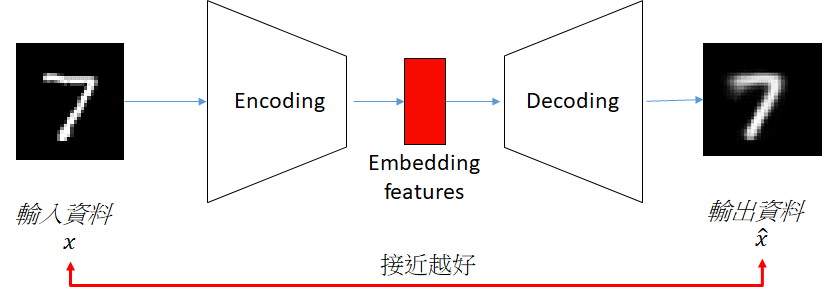


<font size =4 >

<br>AE包含了「**Encoder network**」 和 「**Decoder Network**」 兩個網路，而中間那層紅色那塊就是 「編碼後特徵」，所以資料特性(Embedding features)越像的則在此Embedding space會越接近。  讓資料自行進行物以類聚的學習。<br>

Note: VAE(Variational AE), DAE(Denoise AE)都屬於此架構的變形。<br>
</font>    


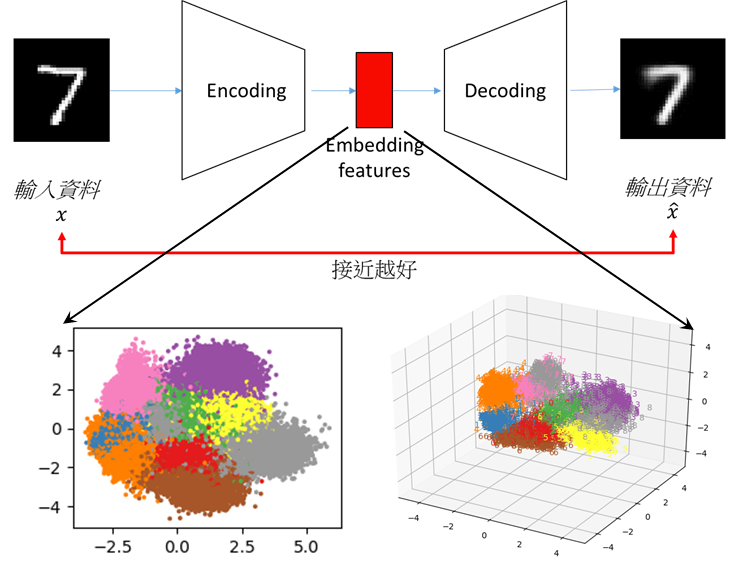

<font size =4 >上圖Embedding features<br>
    左圖為我們將資料encode到2維空間表現<br>
    右圖為我們將資料encode3D空間表現<br>
    所以AE特徵學得好，在embedding space同一個類別的資料會被Encoder群聚到同一個位置附近。
</font>    

## 3. 資料生成

<font size=4>
    
在如果在某一類別的Embedding space上取一任意生成一個點座標(影像特徵概念)，在藉由Decoder Network還原我們就可以得到一個新的影像資料。
→**這個觀念超級重要的，因為只要是資料生成都同屬這個概念，包含GAN也是。**
</font>

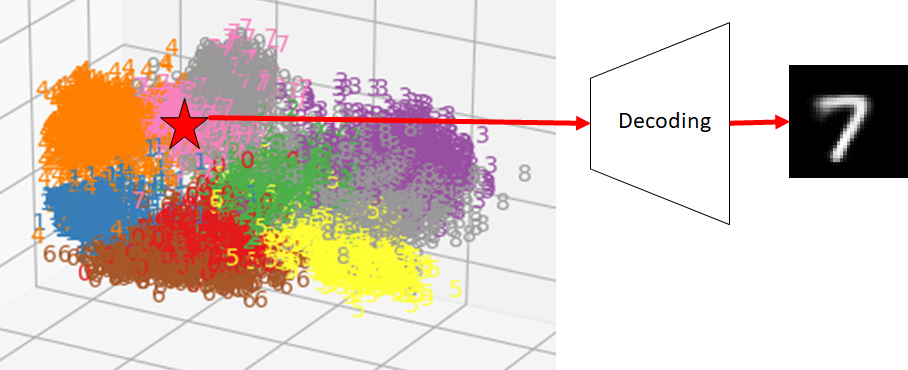

-------------------------------------------------------------------------
## 因為後面範例我將用MLP進行AE實驗，所以補充說明: Flatten怎麼做
通常用
1. torchtensor.view(需自行指定大小)
2. torch.flatten(torchtensor)

### Example 1: How to flatten a digit image in Pytorch.
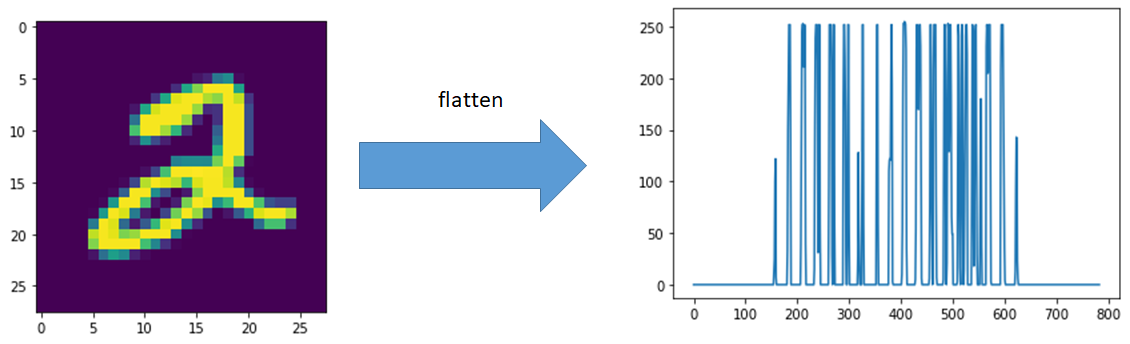

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

torch.Size([10, 1, 28, 28])


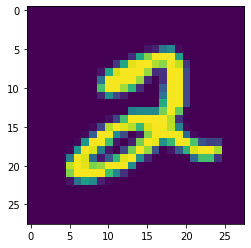

torch.Size([10, 784])


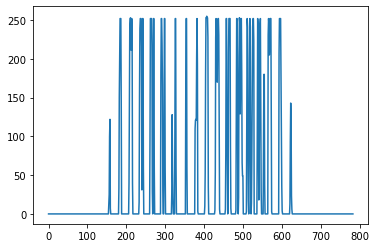

In [1]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
torch.manual_seed(0)
train_loader = DataLoader(datasets.MNIST('./dataset', train=True, download=False,transform=transforms.ToTensor()), 
                          batch_size=10, 
                          shuffle=False)
for data, targets in train_loader:
    break
print(data.shape)
plt.imshow(data[5,0,:,:]*255)
plt.show()
inputs = data.view(-1, 784)
print(inputs.shape)
plt.plot(inputs[5,:]*255)
plt.show()

### Example2: How to flatten a 2D tensor (1ch image) to 1D array in Pytorch.
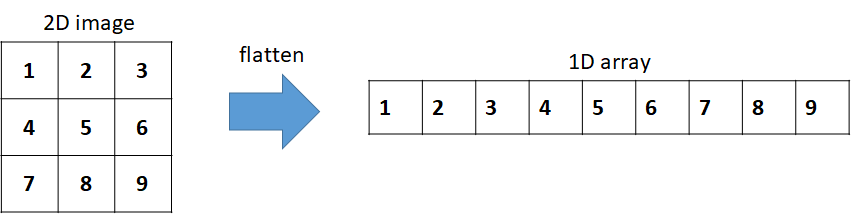

In [2]:
InputImage = torch.FloatTensor([[ 1, 2, 3],
                                [ 4, 5, 6],
                                [ 7, 8, 9]]).unsqueeze(axis=0) # 1,3,3
print(InputImage.shape)
print(InputImage)
InputImage1 = InputImage.view(-1,9)
print(InputImage1.shape)
print(InputImage1)
InputImage2 = torch.flatten(InputImage)
print(InputImage2.shape)
print(InputImage2)


torch.Size([1, 3, 3])
tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]])
torch.Size([1, 9])
tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
torch.Size([9])
tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])


### Example 3: How to flatten a 3D tensor (2ch image) to 2D array in Pytorch.
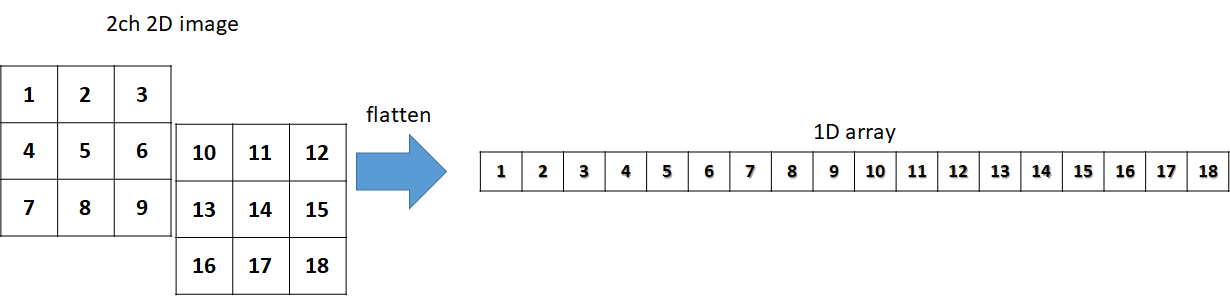

In [3]:
InputImage = torch.FloatTensor([
                                [[ 1,2,3],
                                 [ 4,5,6],
                                 [ 7,8,9]],
                                [[ 10,11,12],
                                 [ 13,14,15],
                                 [ 16,17,18]]
                                ]).unsqueeze(axis=0) # 1*2*3*3
print(InputImage.shape)
print(InputImage)
InputImage1 = InputImage.view(-1,18)
print(InputImage2.shape)
print(InputImage2)
InputImage2 = torch.flatten(InputImage)
print(InputImage2.shape)
print(InputImage2)


torch.Size([1, 2, 3, 3])
tensor([[[[ 1.,  2.,  3.],
          [ 4.,  5.,  6.],
          [ 7.,  8.,  9.]],

         [[10., 11., 12.],
          [13., 14., 15.],
          [16., 17., 18.]]]])
torch.Size([9])
tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])
torch.Size([18])
tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18.])


# Pytorch: AutoEncoder for MNIST.
<font size = 3>這邊我將建立一個MLP形狀的AE，並且以MNIST作為範例資料。<br>
    在MNIST的每一張圖為28*28的解析大小的灰階圖像，先用flatten方式將圖像轉換成784維的1D向量。<br>
    我將建立一個Encoder Network為3層Hidden layer和最後一層為embedding layer，和一個Decoder Network，layer為對稱於Encoder層的架構，見下圖。
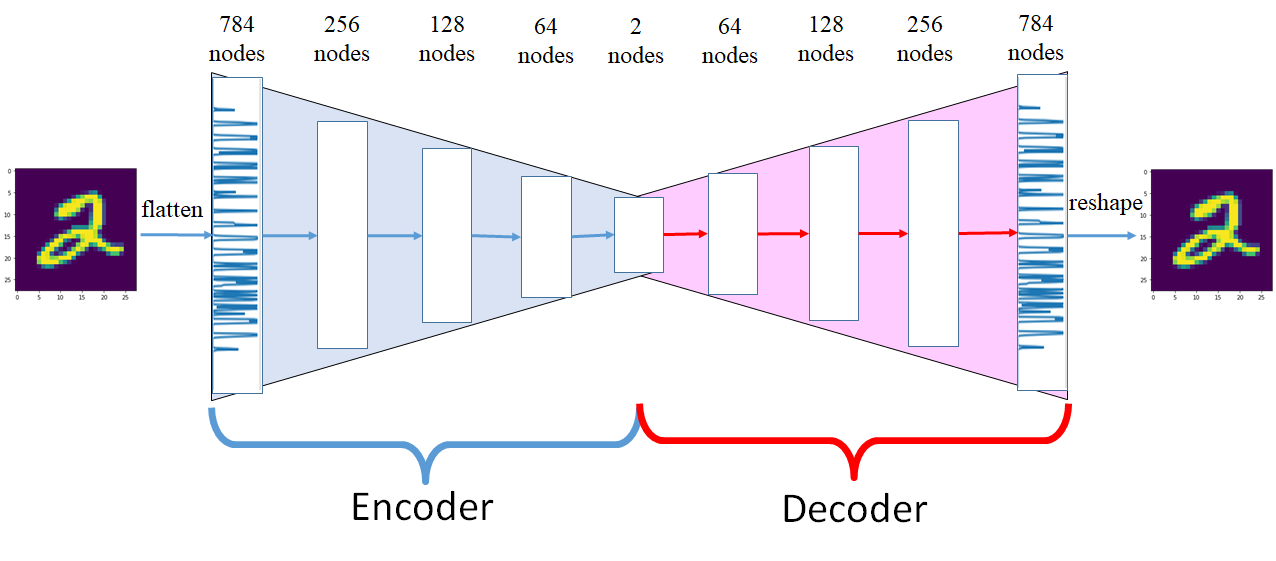

In [4]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import numpy as np
import torchvision.utils as vutils
import PIL.Image as Image

# Model structure
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.Tanh(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 2),
            nn.Tanh()
        )
    def forward(self, inputs):
        codes = self.encoder(inputs)
        return codes
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 784),
            nn.Sigmoid()
        )
    def forward(self, inputs):
        outputs = self.decoder(inputs)
        return outputs

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder
        self.encoder = Encoder()
        # Decoder
        self.decoder = Decoder()

    def forward(self, inputs):
        codes = self.encoder(inputs)
        decoded = self.decoder(codes)
        return codes, decoded

<font size=4>
Dataloader、optimizer、loss function和scheduler都不是本次的重點，所以我直接宣告。
    <font>

In [5]:
epochs = 20
batch_size = 64
lr = 0.001
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
train_loader = DataLoader(datasets.MNIST('./dataset', train=True, download=False, transform=transforms.ToTensor()), 
                          batch_size=batch_size, 
                          shuffle=True)
model_ae = AutoEncoder().to(device)
optimizer = torch.optim.Adam(model_ae.parameters(), lr=lr)
loss_function = nn.MSELoss().to(device)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10,40], gamma=0.5)


模型訓練開始

In [6]:
# Train
log_loss=[]
for epoch in range(epochs):
    total_loss = 0
    for data, _ in train_loader:
        inputs = data.view(-1, 784).to(device) 
        model_ae.zero_grad()
        # Forward
        codes, decoded = model_ae(inputs)
        loss = loss_function(decoded, inputs)
        loss.backward()
        optimizer.step()
        total_loss+=loss
        log_loss.append(loss)
    total_loss /= len(train_loader.dataset)
    scheduler.step()
    
    if epoch % 5 ==0:
        print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())
print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())


[1/20] Loss: 0.0009628137922845781
[6/20] Loss: 0.0006008394993841648
[11/20] Loss: 0.0005591197405010462
[16/20] Loss: 0.0005476143560372293
[20/20] Loss: 0.0005424991250038147


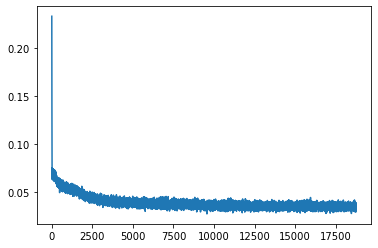

In [7]:
plt.plot(log_loss)
torch.save(model_ae, 'mode_AutoEncoder_MNIST.pth')

Original Images


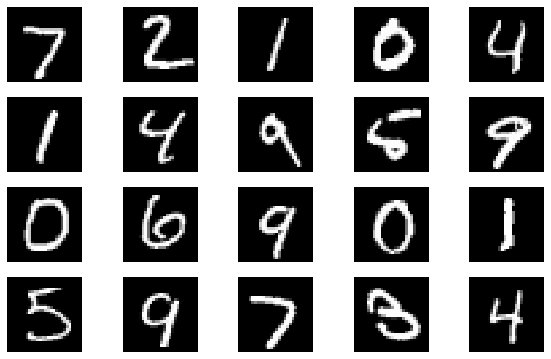

Restructured Image by AE


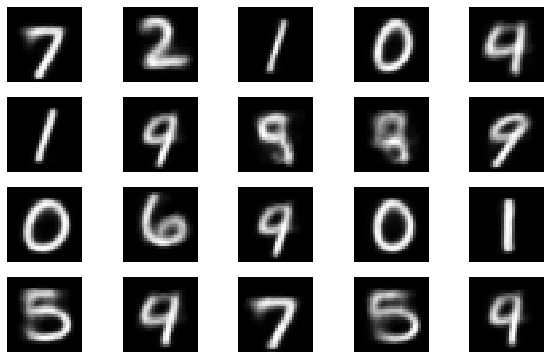

Original Images


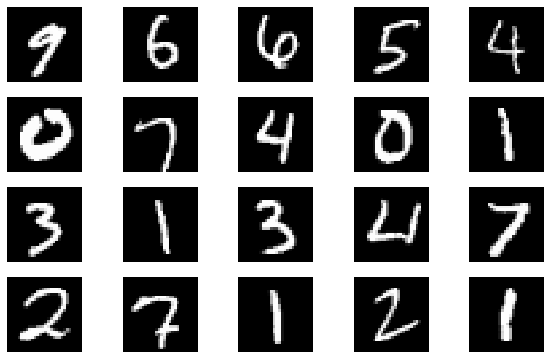

Restructured Image by AE


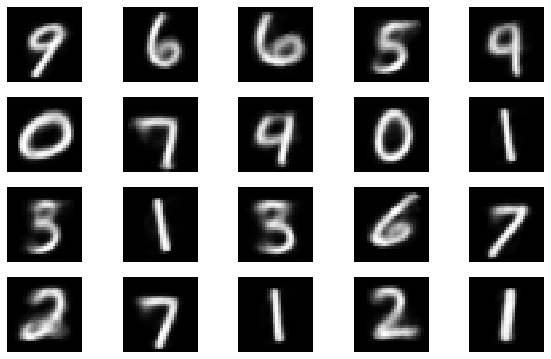

In [8]:
# Settings
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Show images
def show_images(images):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
        plt.axis('off')

# Load model
model_ae = torch.load('mode_AutoEncoder_MNIST.pth')
model_ae.eval()


# DataLoader
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./dataset', train=False, download=False, transform= transforms.ToTensor()),
                                          batch_size=20)

# Test
with torch.no_grad():
    for i, (data, target) in enumerate(test_loader):
        inputs = data.view(-1, 28*28)
        print('Original Images')
        show_images(inputs)
        plt.show()

        # Forward
        codes, outputs = model_ae(inputs.to(device))
        outputs = outputs.detach().cpu()
        print('Restructured Image by AE')
        show_images(outputs)
        plt.show()
        if i>0:
            break

### 我們利用一下視覺化(Visualization)來觀察一下Embedding Feature和圖片的關係

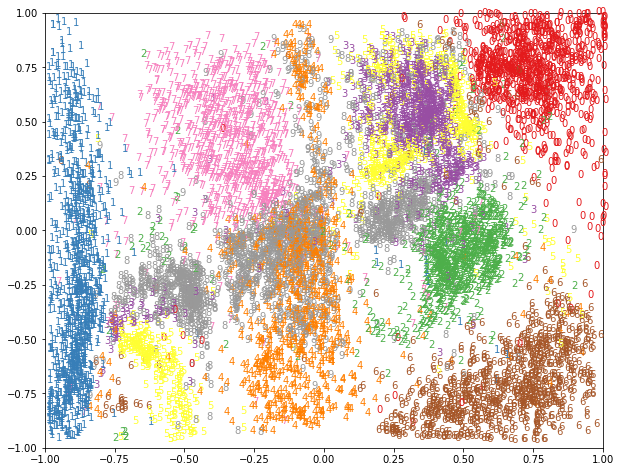

In [33]:
axis_x = []
axis_y = []
answers = []
with torch.no_grad():
    for i, (data, target) in enumerate(test_loader):
        inputs = data.view(-1, 28*28)
        answers += target.tolist()
        # Forward
        codes, outputs = model_ae(inputs.to(device))
        codes = codes.detach().cpu()
        axis_x += codes[:, 0].tolist()
        axis_y += codes[:, 1].tolist()

answers = np.array(answers)
axis_x = np.array(axis_x)
axis_y = np.array(axis_y)

fig, ax = plt.subplots()
for i in range(len(answers)):
    ax.text(axis_x[i], axis_y[i], str(answers[i]), color=plt.cm.Set1(answers[i]))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()





<font size=4>
    因為我的AE Embedding Features有用tanh限制範圍在-1~1之間，所以可以看到embedding features的兩個維度會介於-1~1之間。<br>
    雖然網路沒有學得很好，但現階段可以看出不同類別之間在Embedding space有各自佔有的位置。
    
</font>

-----------------------
<font size=4> 上述的方法還是沒有辦法直接拿來生成，因為Encoder和Decoder被我直接包在同一個模型了<br>
    所以我們將Encoder和Decoder拆開分別宣告。

[1/20] Loss: 0.0009139427565969527
[6/20] Loss: 0.0005936376983299851
[11/20] Loss: 0.0005673299892805517
[16/20] Loss: 0.0005563251907005906
[20/20] Loss: 0.0005493505159392953


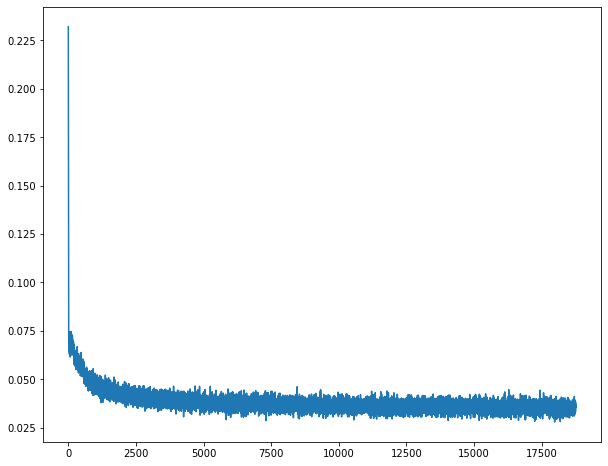

In [14]:
epochs = 20
batch_size = 64
lr = 0.001
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
train_loader = DataLoader(datasets.MNIST('./dataset', train=True, download=False, transform=transforms.ToTensor()), 
                          batch_size=batch_size, 
                          shuffle=True)

model_encoder = Encoder().to(device)
model_decoder = Decoder().to(device)

optimizer_En = torch.optim.Adam(model_encoder.parameters(), lr=lr)
optimizer_De = torch.optim.Adam(model_decoder.parameters(), lr=lr)
loss_function = nn.MSELoss().to(device)

# Train
model_encoder.train()
model_decoder.train()
log_loss=[]
for epoch in range(epochs):
    total_loss = 0
    for data, _ in train_loader:
        inputs = data.view(-1, 784).to(device) 
        
        model_encoder.zero_grad()
        model_decoder.zero_grad()
        
        codes = model_encoder(inputs)
        decoded = model_decoder(codes)
        loss = loss_function(decoded, inputs)
        loss.backward()
        
        optimizer_En.step()
        optimizer_De.step()
        
        total_loss+=loss
        log_loss.append(loss)
    total_loss /= len(train_loader.dataset)
    
    if epoch % 5 ==0:
        print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())
print('[{}/{}] Loss:'.format(epoch+1, epochs), total_loss.item())
plt.plot(log_loss)
torch.save(model_encoder, 'mode_AutoEncoder_MNIST_Encoder.pth')
torch.save(model_decoder, 'mode_AutoEncoder_MNIST_Decoder.pth')

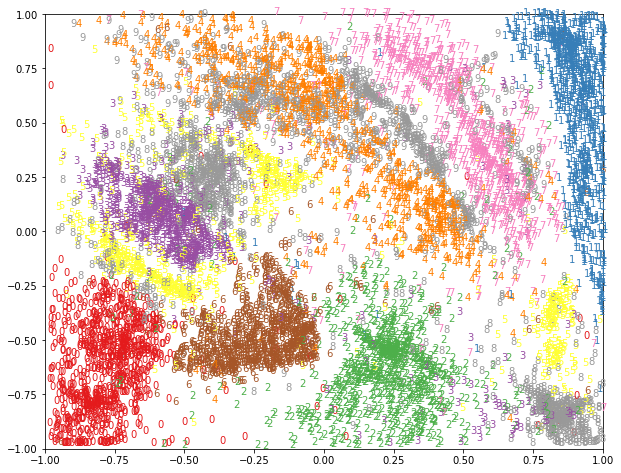

In [41]:
axis_x = []
axis_y = []
answers = []
model_encoder.eval()
model_decoder.eval()
with torch.no_grad():
    for i, (data, target) in enumerate(test_loader):
        inputs = data.view(-1, 28*28).to(device)
        answers += target.tolist()
        # Forward
        model_encoder.zero_grad()
        model_decoder.zero_grad()
        
        codes = model_encoder(inputs)
        decoded = model_decoder(codes)
        codes = codes.detach().cpu()
        axis_x += codes[:, 0].tolist()
        axis_y += codes[:, 1].tolist()

answers = np.array(answers)
axis_x = np.array(axis_x)
axis_y = np.array(axis_y)

fig, ax = plt.subplots()
for i in range(len(answers)):
    ax.text(axis_x[i], axis_y[i], str(answers[i]), color=plt.cm.Set1(answers[i]))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()


Generated Images by AE


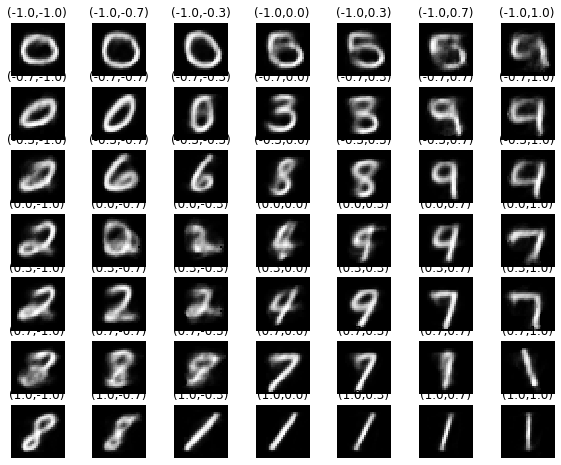

In [48]:
# Show images
def show_images(images, pos):
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    for index, image in enumerate(images):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(image.reshape(28, 28))
        plt.title('({:.1f},{:.1f})'.format(pos[index,0],pos[index,1]))
        plt.axis('off')

# Load model
data=[]
pos=[]
n_split=4
for i in range(2*n_split+1):
    for j in range(2*n_split+1):
        pos.append([(i-n_split)*(1/n_split), (j-n_split)*(1/n_split)])
        data.append(np.array([(i-n_split)*(1/n_split), (j-n_split)*(1/n_split)]))

pos = np.array(pos)
codes = torch.FloatTensor(data)

model_decoder = torch.load('mode_AutoEncoder_MNIST_Decoder.pth')
model_decoder.eval()
outputs = model_decoder(codes.to(device))
outputs = outputs.detach().cpu()
print('Generated Images by AE')
show_images(outputs, pos)
plt.show()


<font size=4>
因為我們Embedding Sapce有用tanh限制值域在-1~1之間<br>
但我們生成資料得時候還是可以超過範圍來生成，見下範例<br>
只是有可能生成出來的東西會很怪。

Generated Images by AE


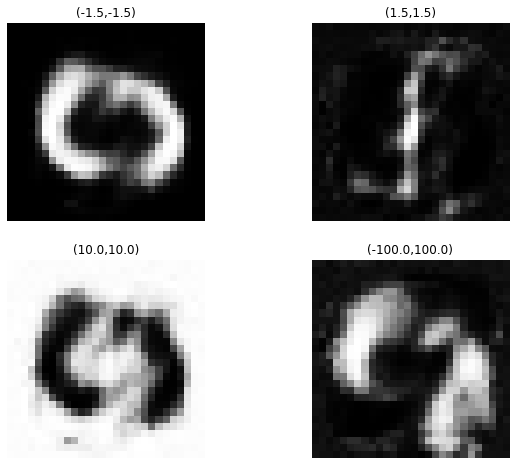

In [51]:
pos = np.array([[-1.5,-1.5],[1.5,1.5],[10,10],[-100,100]])
codes = torch.FloatTensor([[-1.5,-1.5],[1.5,1.5],[10,10],[-100,100]])

model_decoder = torch.load('mode_AutoEncoder_MNIST_Decoder.pth')
model_decoder.eval()
outputs = model_decoder(codes.to(device))
outputs = outputs.detach().cpu()
print('Generated Images by AE')
show_images(outputs, pos)
plt.show()